# Sentiment Analysis !

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


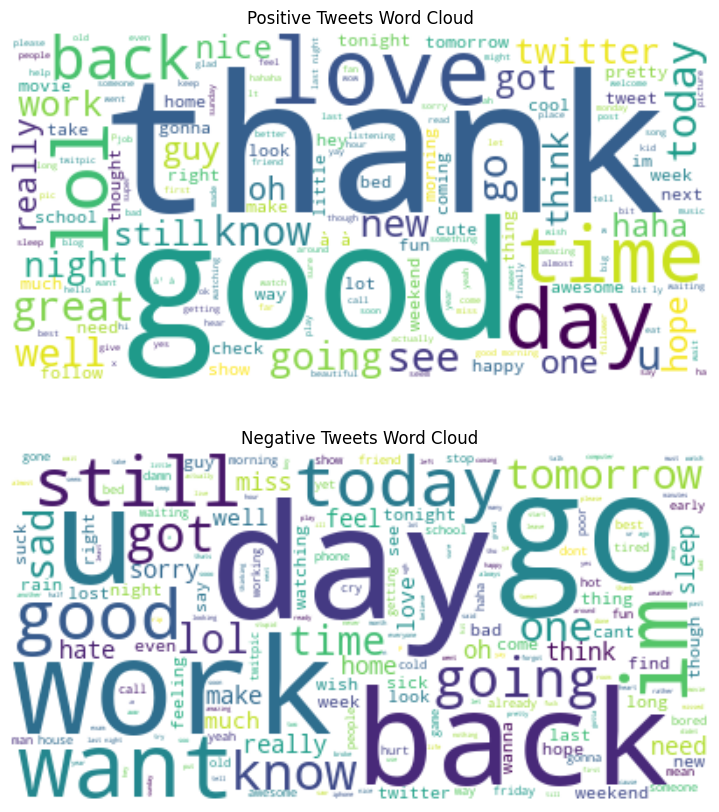

In [5]:
# import field
from nltk.corpus import stopwords
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

### data load
df = pd.read_csv('tweets.csv', encoding='latin1', header = None)

### process text

# stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.update({'quot', 'amp'})

def process_text(text):
    # 텍스트 소문자로 변환
    text = text.lower()
    # 특수문자, 숫자 제거
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    # 불용어 제거 => ' '으로 구분된 통 스트링
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# processed_text 컬럼 생성
df['processed_text'] = df[5].apply(process_text)

### 워드 클라우드 


sample_size = 1000  # 샘플링할 트윗 수

# 샘플링
positive_sample = df[df[0] == 4].sample(sample_size, random_state=1)
negative_sample = df[df[0] == 0].sample(sample_size, random_state=1)

# 각각의 워드 클라우드 생성
positive_wordcloud = WordCloud(max_words=200, background_color="white", stopwords=STOPWORDS).generate(' '.join(positive_sample['processed_text']))
negative_wordcloud = WordCloud(max_words=200, background_color="white", stopwords=STOPWORDS).generate(' '.join(negative_sample['processed_text']))


# plot
plt.figure(figsize=(20,10))
# positive plot
plt.subplot(2,1,1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis("off")
# negative plot
plt.subplot(2,1,2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Tweets Word Cloud')
plt.axis("off")

plt.show()

In [13]:
# 배포용을 위한 작은 데이터셋 만들기 !

### data load
df = pd.read_csv('tweets.csv', encoding='latin1', header = None)

sample_size = 4000
positive_sample = df[df[0] == 4].sample(sample_size, random_state=1)
negative_sample = df[df[0] == 0].sample(sample_size, random_state=1)

# 샘플데이터 셋 만들기
df_sample = pd.concat([positive_sample, negative_sample])

df_sample.to_csv('tweets_sample.csv', index=None)